Rayleigh PhaseDispersion/面波频散曲线
---

velocity_model= [[10.   7.6  3.5  2. ]
 [10.   6.8  3.4  2. ]
 [10.   7.   3.5  2. ]
 [10.   7.6  3.8  2. ]
 [10.   8.4  4.2  2. ]]


<function matplotlib.pyplot.show(close=None, block=None)>

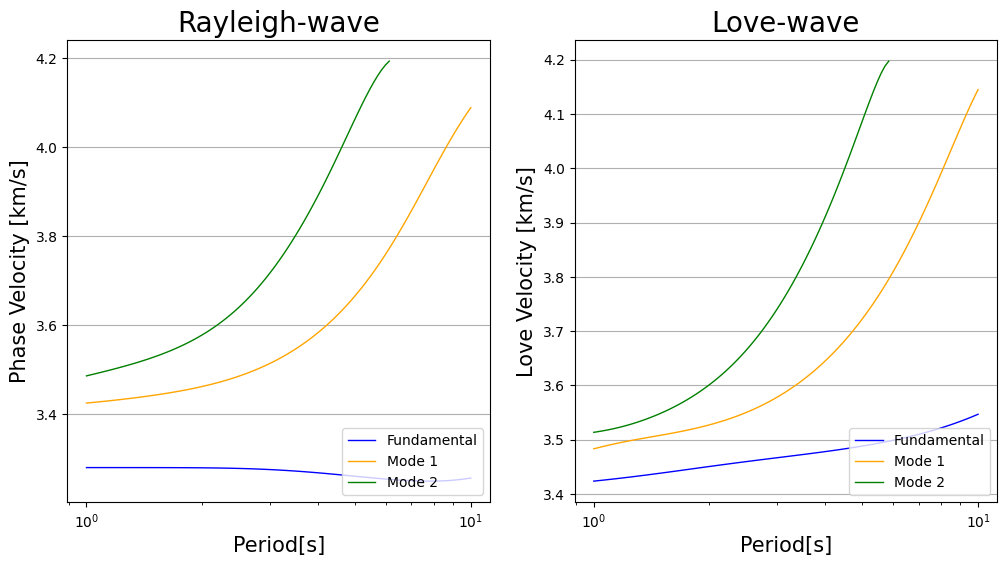

In [2]:
#usage:The following example computes the Rayleigh- and Love- wave 
#phase velocity dispersion curves for the 3 first modes
#计算瑞雷波/勒夫波前三个阶次的相速度频散曲线(根据输入模型计算理论频散曲线)
import numpy as np
from disba import PhaseDispersion           #计算相速度频散
#from disba import GroupDispersion          #计算群速度频散
from matplotlib import pyplot as plt

# Velocity model
# thickness, Vp, Vs, density
# km, km/s, km/s, g/cm3
#1.vp=1.360+1.16*vs
# velocity_model = np.array([
#     [0.02, 0.30, 0.15, 2.00],
#     [0.02, 0.50, 0.25, 2.00],
#     [0.02, 0.6, 0.35, 2.00],
#     [0.04, 0.90, 0.45, 2.00],
# ])

##0.read velocity model读取速度模型
velocity_model=np.loadtxt('D:/Code/Code/Python Code/data/temp/mode.txt',skiprows=1)
print('velocity_model=',velocity_model)

# Periods must be sorted starting with low periods
#t = numpy.logspace(0.0, 3.0, 100)
t = np.logspace(0.0, 1, 100)           #创建等比数列(周期)
#print('t=',t)

# Compute the 3 first Rayleigh- and Love- wave modal dispersion curves 计R/L频散曲线
# Fundamental mode corresponds to mode 0(基阶mode=0)
pd = PhaseDispersion(*velocity_model.T)
#print(pd)
#pd = GroupDispersion(*velocity_model.T)
cpr = [pd(t, mode=i, wave="rayleigh") for i in range(3)]
cpl = [pd(t, mode=i, wave="love") for i in range(3)]

##开始画图
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6),sharey=False)

##1.Rayleigh Dispersion
#ax1.set_xscale("log")
#ax1.set_xlim(1,1000)
ax1.set_xlabel("Period[s]",fontsize=15)
# ax1.set_ylim(3.2,4.8)
ax1.grid(axis="y")
ax1.set_ylabel("Phase Velocity [km/s]",fontsize=15)
ax1.plot(cpr[0][0],cpr[0][1],color="blue",linewidth=1,label="Fundamental")
ax1.plot(cpr[1][0],cpr[1][1],color="orange",linewidth=1,label="Mode 1")
ax1.plot(cpr[2][0],cpr[2][1],color="green",linewidth=1,label="Mode 2")
ax1.legend(loc="lower right",fontsize=10)
ax1.set_title("Rayleigh-wave",fontsize=20)
ax1.set_xscale('log')
#print("cpr =",cpr)
#print("mode 0 cpr=",cpr[0])
#print("mode 1 cpr=",cpr[1])
#print("mode 2 cpr =",cpr[2])	
#print("mode 2 cpr period =",cpr[2][0])			#period
#print("mode 2 cpr velocity =",cpr[2][1])		#velocity
#print("mode 2 cpr mode =",cpr[2][2])			#mode
#print("mode 2 cpr wave =",cpr[2][3])			#wave
#print("mode 2 cpr type =",cpr[2].type)			#type
# pd returns a namedtuple (period, velocity, mode, wave, type)

##2.Love Dispersion
#print("cpl =",cpl)
#ax2.set_xscale("log")
#ax2.set_xlim(1,1000)
ax2.set_xlabel("Period[s]",fontsize=15)
#ax2.set_ylim(3.2,4.8)
ax2.grid(axis="y")
ax2.set_ylabel("Love Velocity [km/s]",fontsize=15)
ax2.plot(cpl[0].period,cpl[0].velocity,color="blue",linewidth=1,label="Fundamental")
ax2.plot(cpl[1].period,cpl[1].velocity,color="orange",linewidth=1,label="Mode 1")
ax2.plot(cpl[2].period,cpl[2].velocity,color="green",linewidth=1,label="Mode 2")
ax2.legend(loc="lower right",fontsize=10)
ax2.set_title("Love-wave",fontsize=20)
ax2.set_xscale('log')
plt.show
##3.保存图片
#plt.subplot_tool()
#plt.show()
#plt.tight_layout()
#plt.savefig('1syn_RL_phaseDisp.png',dpi=300)


PhaseDispersion

[[10.   7.6  3.5  2. ]
 [10.   6.8  3.4  2. ]
 [10.   7.   3.5  2. ]
 [10.   7.6  3.8  2. ]
 [10.   8.4  4.2  2. ]]


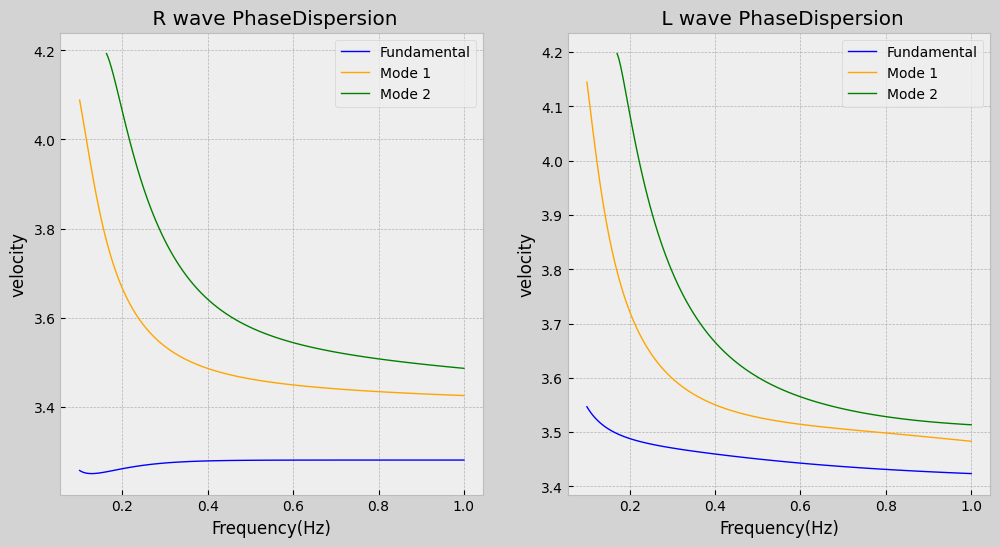

In [6]:
f1=1/t;
plt.style.use('bmh')
fig,axs=plt.subplots(1,2,facecolor='lightgrey',figsize=(12,6))
#ax.patch.set_facecolor('lightblue')#更改绘图区颜色
#r wave
axs[0].plot(f1,cpr[0].velocity,color="blue",linewidth=1,label="Fundamental")
f2=1/(cpr[1].period)
axs[0].plot(f2,cpr[1].velocity,color="orange",linewidth=1,label="Mode 1")
f3=1/(cpr[2].period)
axs[0].plot(f3,cpr[2].velocity,color="green",linewidth=1,label="Mode 2")
axs[0].legend()
axs[0].set_title(' R wave PhaseDispersion')
axs[0].set_ylabel('velocity')
axs[0].set_xlabel('Frequency(Hz)')
# axs[0].set_ylim(0.1,0.5)
#l wave
axs[1].plot(f1,cpl[0].velocity,color="blue",linewidth=1,label="Fundamental")
f2=1/(cpl[1].period)
axs[1].plot(f2,cpl[1].velocity,color="orange",linewidth=1,label="Mode 1")
f3=1/(cpl[2].period)
axs[1].plot(f3,cpl[2].velocity,color="green",linewidth=1,label="Mode 2")
axs[1].legend()
axs[1].set_title(' L wave PhaseDispersion')
axs[1].set_ylabel('velocity')
axs[1].set_xlabel('Frequency(Hz)')
# axs[1].set_ylim(0.1,0.5)

print(velocity_model)
plt.show()

>>EigenFunction

[[10.   7.6  3.5  2. ]
 [10.   6.8  3.4  2. ]
 [10.   7.   3.5  2. ]
 [10.   7.6  3.8  2. ]
 [10.   8.4  4.2  2. ]]


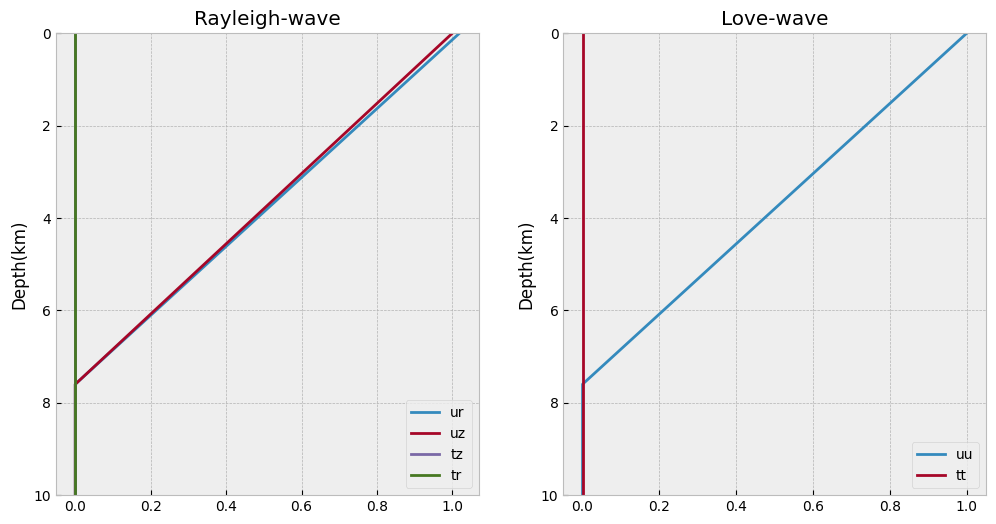

In [18]:
from disba import EigenFunction

from disba._helpers import resample



velocity_model_thickness=velocity_model[0]
velocity_model_vp=velocity_model[1]
velocity_model_vs=velocity_model[2]
velocity_model_rho=velocity_model[3]
eigf = EigenFunction(velocity_model_thickness,velocity_model_vp,velocity_model_vs,velocity_model_rho)
eigr = eigf(0.1, mode=0, wave="rayleigh")
eigl = eigf(0.1, mode=0, wave="love")
print(velocity_model)
# eigf returns a namedtuple
#  - (depth, ur, uz, tz, tr, period, mode) for Rayleigh-wave
#  - (depth, uu, tt, period, mode) for Love-wave
fig,axs=plt.subplots(1,2,figsize=(12,6),sharey=False)
axs[0].set_ylim(10,0)
axs[0].plot(eigr.ur,eigr.depth,label='ur')
axs[0].plot(eigr.uz,eigr.depth,label='uz')
axs[0].plot(eigr.tz,eigr.depth,label='tz')
axs[0].plot(eigr.tr,eigr.depth,label='tr')
axs[0].set_title('Rayleigh-wave')
axs[0].set_ylabel('Depth(km)')
axs[0].legend()

axs[1].plot(eigl.uu,eigl.depth,label='uu')
axs[1].plot(eigl.tt,eigl.depth,label='tt')
axs[1].set_ylim(10,0)#设置y范围
#axs[1].set_xlim(-2,2)
axs[1].set_title('Love-wave')
axs[1].set_ylabel('Depth(km)')
axs[1].legend()
plt.show()

PhaseSensitivity(相速度敏感核)

[[10.   7.6  3.5  2. ]
 [10.   6.8  3.4  2. ]
 [10.   7.   3.5  2. ]
 [10.   7.6  3.8  2. ]
 [10.   8.4  4.2  2. ]]


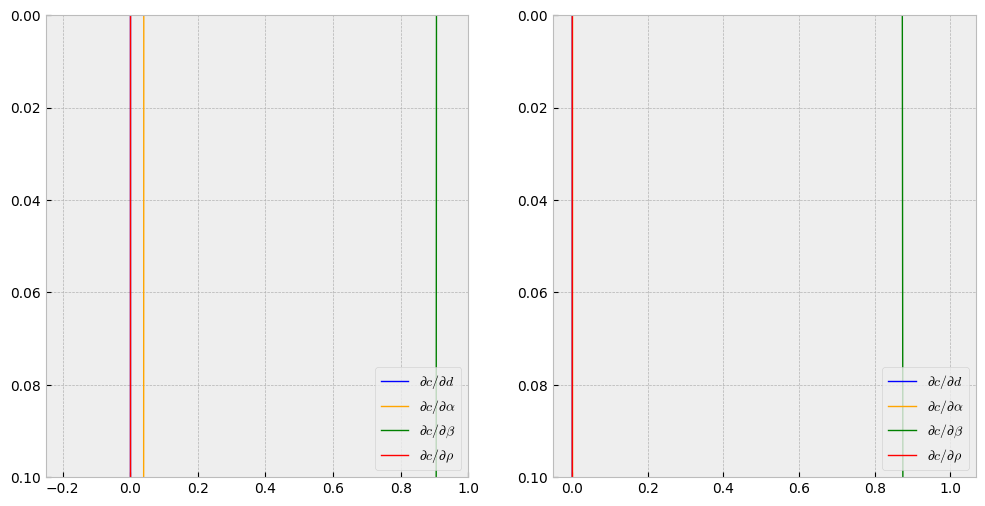

In [8]:
from disba import PhaseSensitivity

print(velocity_model)

ps = PhaseSensitivity(*velocity_model.T)
parameters = ["thickness", "velocity_p", "velocity_s", "density"]
skr = [ps(0.1, mode=0, wave="rayleigh", parameter=parameter) for parameter in parameters]
skl = [ps(0.1, mode=0, wave="love", parameter=parameter) for parameter in parameters]
# ps returns a namedtuple (depth, kernel, period, velocity, mode,wave, type, parameter)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,6),sharey=False)
ax1.set_ylim(0.1,0)
ax1.set_xlim(-0.25,1)
#R wave
ax1.plot(skr[0].kernel,skr[0].depth,color="blue",linewidth=1,label=r'${\partial c}/{\partial d}$')
ax1.plot(skr[1].kernel,skr[1].depth,color="orange",linewidth=1,label=r'${\partial c}/{\partial \alpha}$')
ax1.plot(skr[2].kernel,skr[2].depth,color="green",linewidth=1,label=r'${\partial c}/{\partial \beta}$')
ax1.plot(skr[3].kernel,skr[3].depth,color="red",linewidth=1,label=r'${\partial c}/{\partial \rho}$')
ax1.legend(loc="lower right",fontsize=10)
#L wavee
ax2.plot(skl[0].kernel,skl[0].depth,color="blue",linewidth=1,label=r'${\partial c}/{\partial d}$')
ax2.plot(skl[1].kernel,skl[1].depth,color="orange",linewidth=1,label=r'${\partial c}/{\partial \alpha}$')
ax2.plot(skl[2].kernel,skl[2].depth,color="green",linewidth=1,label=r'${\partial c}/{\partial \beta}$')
ax2.plot(skl[3].kernel,skl[3].depth,color="red",linewidth=1,label=r'${\partial c}/{\partial \rho}$')
ax2.set_ylim(0.1,0)
ax2.legend(loc="lower right",fontsize=10)

plt.show()

Ellipticity and ellipticity sensitivity kernels(椭圆率及椭圆率敏感核):

[[10.   7.6  3.5  2. ]
 [10.   6.8  3.4  2. ]
 [10.   7.   3.5  2. ]
 [10.   7.6  3.8  2. ]
 [10.   8.4  4.2  2. ]]


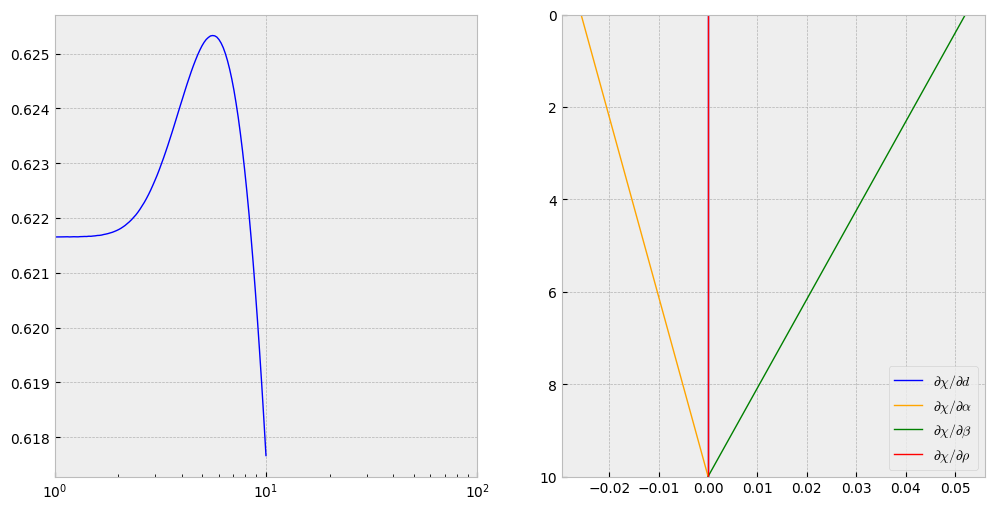

In [19]:
from disba import Ellipticity, EllipticitySensitivity

ell = Ellipticity(*velocity_model.T)

print(velocity_model)
rel = ell(t, mode=0)

# ell returns a namedtuple (period, ellipticity, mode)

es = EllipticitySensitivity(*velocity_model.T)
ek = [es(0.05, mode=0, parameter=parameter) for parameter in parameters]

# es returns a namedtuple (depth, kernel, period, velocity, mode, wave, type, parameter)
fig,axs=plt.subplots(1,2,figsize=(12,6))
axs[0].plot(rel.period,rel.ellipticity,linewidth=1,color='blue')
axs[0].set_xlim(1,100)
axs[0].set_xscale("log")

axs[1].plot(ek[0].kernel,ek[3].depth,color="blue",linewidth=1,label=r'${\partial \chi}/{\partial d}$')
axs[1].plot(ek[1].kernel,ek[1].depth,color="orange",linewidth=1,label=r'${\partial \chi}/{\partial \alpha}$')
axs[1].plot(ek[2].kernel,ek[2].depth,color="green",linewidth=1,label=r'${\partial \chi}/{\partial \beta}$')
axs[1].plot(ek[3].kernel,ek[3].depth,color="red",linewidth=1,label=r'${\partial \chi}/{\partial \rho}$')
axs[1].set_ylim(10,0)
axs[1].legend(loc="lower right",fontsize=10)

plt.show()